In [11]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Loading the Data

In [2]:
#Loading the data
df=pd.read_csv('AmesHousing.csv',index_col=0)
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#Identify number of rows and columns
df.shape

(2930, 81)

In [4]:
# Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Exploring Data Distributions 

### Sale Price Distribution

Producing a histogram for `SalePrice`


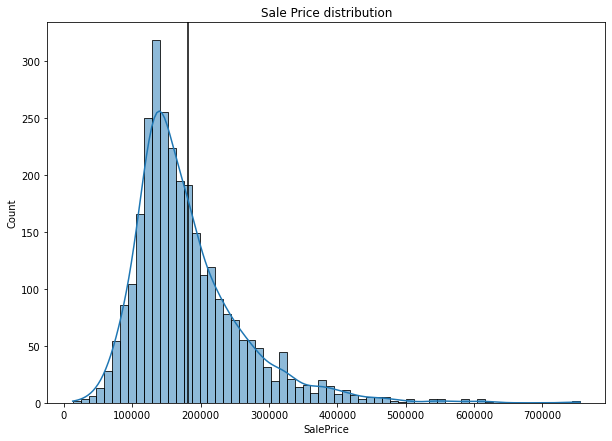

In [28]:
data=df['SalePrice']
mean=data.mean()
fig,ax=plt.subplots(figsize=(10,7))
ax.axvline(mean,color='black')
sns.histplot(data, kde=True)
ax.set_title('Sale Price distribution')
plt.show()

Calculating skewness

In [34]:
round(df['SalePrice'].skew(), 2)

1.74

In [35]:
def print_stats(df,column):
    print('Mean:', df[column].mean())
    print('Median:', df[column].median())
    print('Satandard Deviation:', df[column].std())


print_stats(df,'SalePrice')

Mean: 180796.0600682594
Median: 160000.0
Satandard Deviation: 79886.692356665


Looks like a log normal distribution. Most houses in this sample are clustered around the median value of $160,000, but the   higher-end homes are pulling the mean up to over $180,000. As per result of skew function we can see that its value is positive, this is inline with observation from historgram where tail of distribution is skewed towards right side.

### Total Rooms Above Grade Distribution

Histogram for `TotRmsAbvGrd`

[]

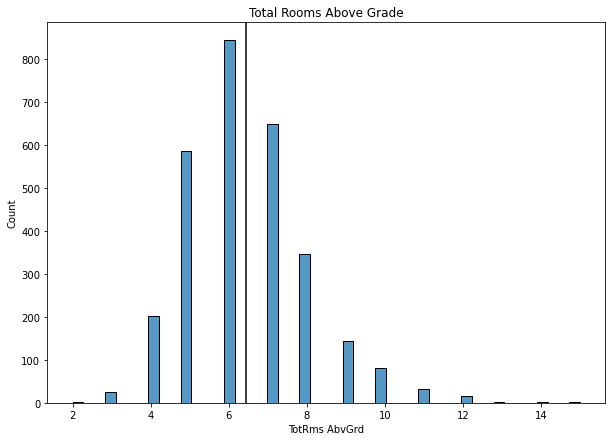

In [42]:
data=df['TotRms AbvGrd']
mean=data.mean()
fig,ax=plt.subplots(figsize=(10,7))
ax.set_title('Total Rooms Above Grade')
ax.axvline(mean,color='black')
sns.histplot(data)
plt.plot()


In [43]:
print_stats(df,'TotRms AbvGrd' )

Mean: 6.443003412969284
Median: 6.0
Satandard Deviation: 1.572964396334462


The number of rooms in houses is approximately normally distributed, with a mean and median around 6 rooms

## Overall Condition

`OverallCond` Histogram

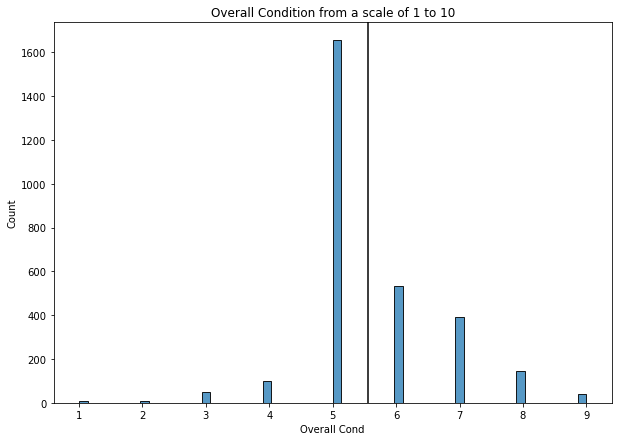

In [45]:
data=df['Overall Cond']
mean=data.mean()
fig,ax=plt.subplots(figsize=(10,7))
sns.histplot(data)
ax.set_title('Overall Condition from a scale of 1 to 10')
ax.axvline(mean,color='black')
plt.show()

In [46]:
print_stats(df, 'Overall Cond')

Mean: 5.563139931740614
Median: 5.0
Satandard Deviation: 1.1115365600303264


Most homes have a condition of 5. It seems like we should treat this as a categorical rather than numeric variable, since the difference between conditions is so abrupt

## Explore Differences Betweeen Subsets

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [57]:
below_average_condition=df[df['Overall Cond']<5]
average_condition=df[df['Overall Cond']==5]
above_average_condition=df[df['Overall Cond']>5]


[]

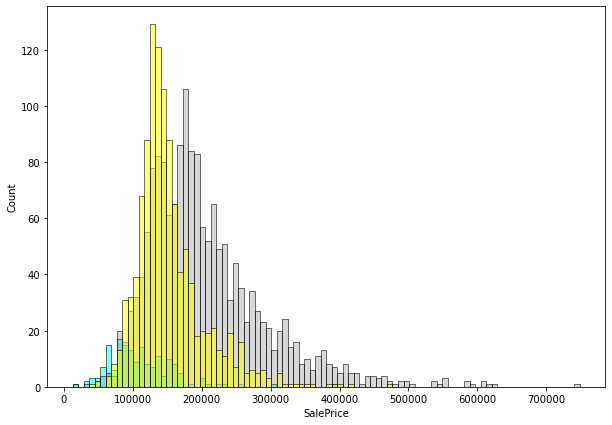

In [59]:
fig,ax=plt.subplots(figsize=(10,7))

#Creating custom bins so they are all on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)
sns.histplot(x=below_average_condition['SalePrice'],bins=bins,color="cyan",
    alpha=0.5)
sns.histplot(x=average_condition['SalePrice'],bins=bins,color="gray",
    alpha=0.3)
sns.histplot(x=above_average_condition['SalePrice'],bins=bins,color="yellow",
    alpha=0.5)
plt.plot()

First, we note again that the majority of the houses have average
condition, then about 1/3 have above average condition, then less
than 10% have below average condition.

As we might expect, the average condition therefore contains houses
across a broader spectrum of the sale price range than either the
below-average or above-average houses.

Another unsurprising finding is that below-average condition houses
have a price distribution that is much lower than average or
above-average condition houses.

But what might be surprising is that above-average condition houses
do not seem to have higher average sale prices than average condition
houses. In fact, above-average condition houses seem more clustered
around a particular price range, especially the $100,000 to $200,000
range, whereas average condition houses are more frequent above
$200,000. We might want to investigate further to understand what
kinds of houses are rated as above-average condition, since this goes
against a standard assumption that better condition would mean higher
cost.